# Description des données


In [32]:
import pandas as pd

In [33]:
donnees_kickstarter = pd.read_csv('donnees_kickstarter/ks-projects.csv',delimiter=',',encoding='latin1')
donnees_kickstarter.head()

,id,name,category,subcategory,country,sex,age,start_date,end_date,currency,goal,pledged,backers,state
0,149450711,Abilities Rock,Art,Art,US,male,26,2015-11-17 19:37:50,2015-12-17 19:37:50,USD,10000.0,0.0,0,failed
1,356418410,De'VIA Elders Reunion,Art,Art,US,female,26,2016-03-21 22:18:52,2016-04-23 04:00:00,USD,7500.0,958.0,15,failed
2,412253775,Help C.B. Farr make a documentary about becomi...,Art,Art,US,female,28,2013-06-05 08:30:31,2013-07-05 08:30:31,USD,20000.0,0.0,0,failed
3,477821027,The London Aesthetifest,Art,Art,US,female,27,2014-06-24 19:49:35,2014-07-15 04:05:00,USD,7800.0,1000.0,15,failed
4,350951514,Hobo Nickels across the nation,Art,Art,US,male,22,2015-10-02 16:00:42,2015-11-01 16:00:42,USD,2621.0,392.0,6,failed


In [34]:
len(donnees_kickstarter.columns)

14

In [26]:
attributes_descriptions = {'ID':'numéro unique assigné au projet par la plateforme',
                          'name':'nom du projet',
                          'category':'thème principal du projet (ex. art)',
                          'subcategory':'sous-thème du projet (ex. peinture, céramique, illustration...)',
                          'country':'pays de l’utilisateur qui porte le projet',
                          'sex':'sex',
                          'age':'âge du porteur, exprimé en années',
                          'start_date':'date de début de l’appel à financement du projet',
                          'end_date':'date de fin de l’appel à financement du projet',
                          'currency':'devise dans laquelle les montants sont exprimées (ex. dollar, euro...)',
                          'goal':'montant demandé pour financer le projet (exprimé dans la devise currency)',
                          'pledged':'montant promis par les utilisateurs soutenant le projet (lui aussi en currency)',
                          'backers':'nombre d’utilisateurs soutenant le projet',
                          'state':'état courant de l’appel à financement du projet (ex. échec, succès, annulé...)'}

## 1) Exploration

### describe

In [41]:
donnees_kickstarter = donnees_kickstarter.drop('id',axis=1)

In [45]:
donnees_kickstarter.describe()

,age,goal,pledged,backers
count,300627.000000,3.006270e+05,3.006270e+05,300627.000000
mean,27.620044,4.637402e+04,8.239740e+03,98.235581
std,7.206378,1.137581e+06,8.688740e+04,890.415481
min,18.000000,1.000000e-02,0.000000e+00,0.000000
25%,23.000000,2.000000e+03,3.000000e+01,2.000000
50%,27.000000,5.000000e+03,6.010000e+02,12.000000
75%,30.000000,1.500000e+04,3.825000e+03,54.000000
max,70.000000,1.000000e+08,2.033899e+07,219382.000000


In [68]:
donnees_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300627 entries, 0 to 300626
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   name         300623 non-null  object 
 1   category     300627 non-null  object 
 2   subcategory  300627 non-null  object 
 3   country      296830 non-null  object 
 4   sex          291719 non-null  object 
 5   age          300627 non-null  int64  
 6   start_date   300627 non-null  object 
 7   end_date     300627 non-null  object 
 8   currency     300627 non-null  object 
 9   goal         300627 non-null  float64
 10  pledged      300627 non-null  float64
 11  backers      300627 non-null  int64  
 12  state        300627 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 29.8+ MB


### Mode

In [48]:
# Calculer les modes pour tous les attributs (colonnes) du DataFrame
modes = donnees_kickstarter.mode()

# Afficher les modes
modes

,name,category,subcategory,country,sex,age,start_date,end_date,currency,goal,pledged,backers,state
0,New EP/Music Development,Film & Video,Product Design,US,female,26,1970-01-01 01:00:00,2012-01-01 05:59:00,USD,5000.0,0.0,0,failed


### Destribution des attribues

In [60]:
attributs_a_visualiser =donnees_kickstarter.columns.unique()
attributs_a_visualiser

Index(['name', 'category', 'subcategory', 'country', 'sex', 'age',
       'start_date', 'end_date', 'currency', 'goal', 'pledged', 'backers',
       'state'],
      dtype='object')

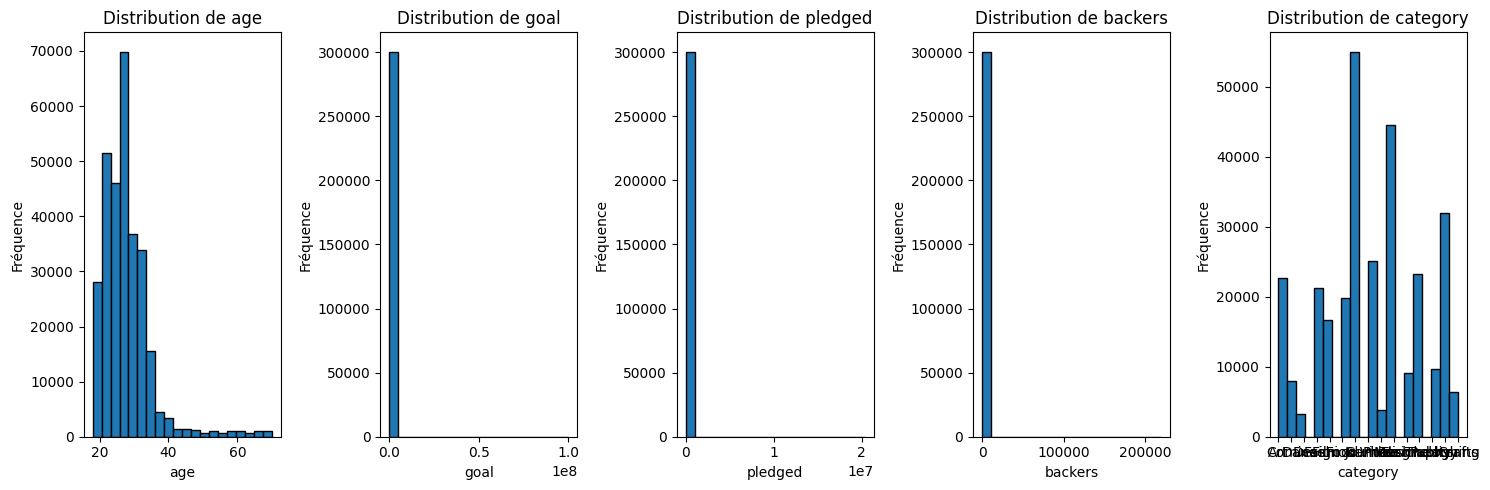

In [63]:
import pandas as pd
import matplotlib.pyplot as plt


# Liste des attributs à visualiser (excluez 'id' et 'name' si nécessaire)
# attributs_a_visualiser = ['category','subcategory','country','sex','age', 'goal','currency','goal', 'pledged', 'backers']
attributs_a_visualiser = ['age', 'goal', 'pledged', 'backers','category']

# Créez une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(1, len(attributs_a_visualiser), figsize=(15, 5))

# Parcourez les attributs et créez un graphique pour chacun
for i, attribut in enumerate(attributs_a_visualiser):
    axes[i].hist(donnees_kickstarter[attribut], bins=20, edgecolor='k')
    axes[i].set_title(f'Distribution de {attribut}')
    axes[i].set_xlabel(attribut)
    axes[i].set_ylabel('Fréquence')

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez les graphiques
plt.show()


In [81]:
import pandas as pd
import matplotlib.pyplot as plt


test_data = donnees_kickstarter.copy()
# Attribut à visualiser

def freq_plot(attribut):
    
    attribut_a_visualiser = attribut
    # attributs_a_visualiser = ['category','subcategory','country','sex','age', 'goal','currency','goal', 'pledged', 'backers']
    test_data[attribut_a_visualiser] = test_data[attribut_a_visualiser].astype(str)
    
#     plt.figure(figsize=(10, 6))  # Largeur x Hauteur en pouces

    # Créez un histogramme pour l'attribut
    plt.hist(test_data[attribut_a_visualiser], bins=20, edgecolor='k')
    plt.title(f'Distribution de {attribut_a_visualiser}')
    plt.xlabel(attribut_a_visualiser)
    plt.ylabel('Fréquence')

    # Affichez le graphique


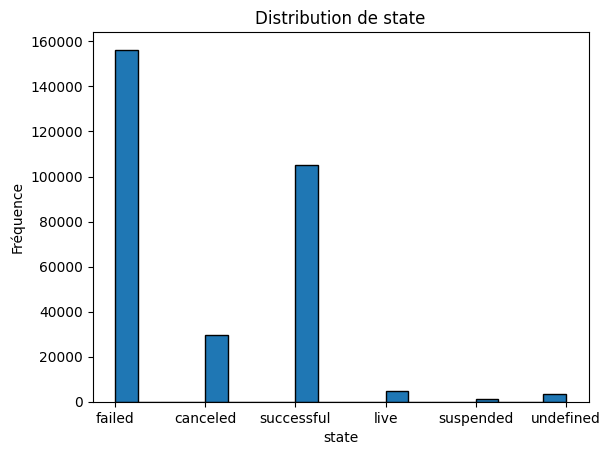

In [87]:
freq_plot('state')


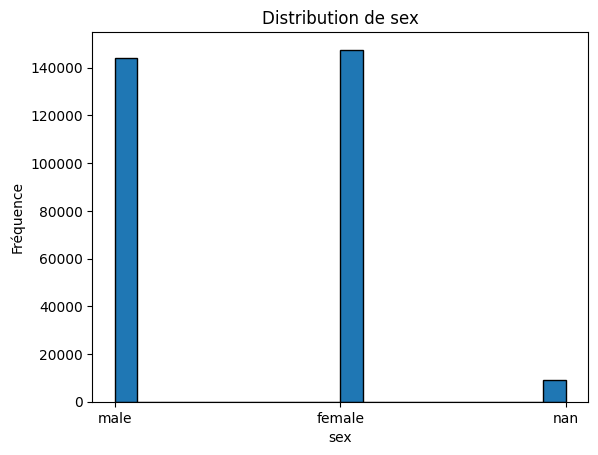

In [82]:
freq_plot('sex')


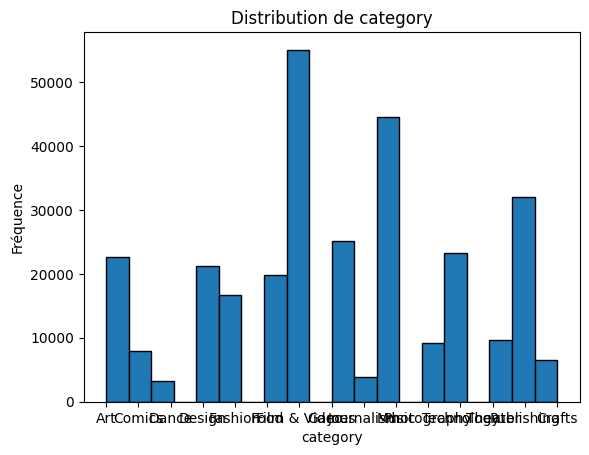

In [83]:
freq_plot('category')


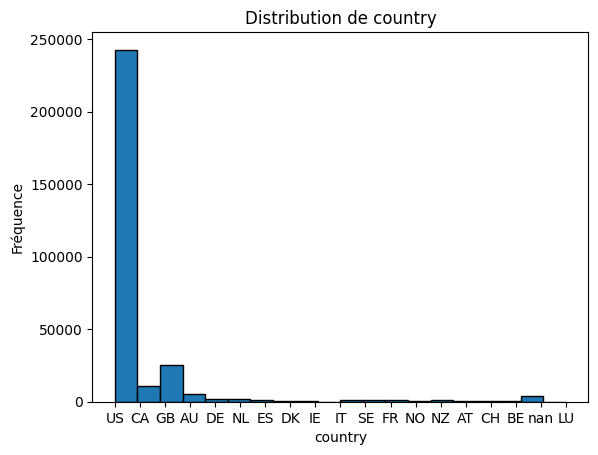

In [84]:
# attributs_a_visualiser = ['category','subcategory','country','sex','age', 'goal','currency','goal', 'pledged', 'backers']
freq_plot('country')


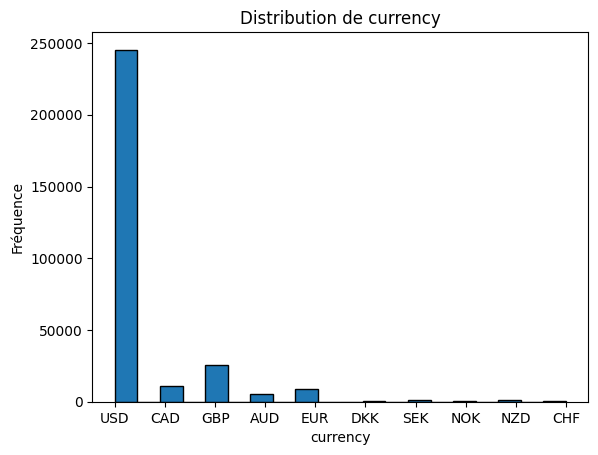

In [85]:
# attributs_a_visualiser = ['category','subcategory','country','sex','age', 'goal','currency','goal', 'pledged', 'backers']
freq_plot('currency')

### Corrélation

C:\Users\samir\AppData\Local\Temp\ipykernel_1360\1934485403.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = donnees_kickstarter.corr()


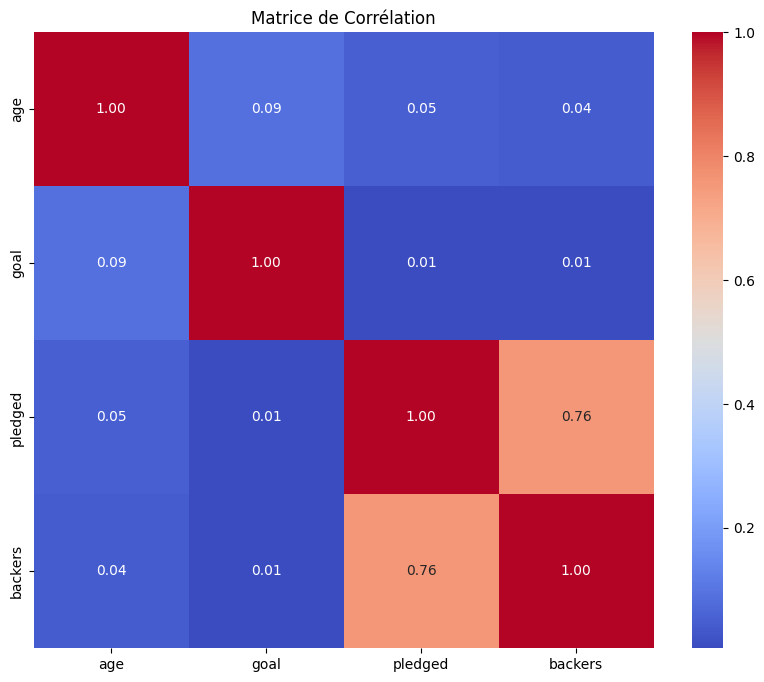

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculer la matrice de corrélation
correlation_matrix = donnees_kickstarter.corr()

# Créer une heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))  # Réglez la taille de la figure selon vos préférences
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()


### Equilibre des classes

une corrélation entre Backers et pledged

## 2) Nettoyage

### Valeurs nuls

In [88]:
donnees_kickstarter.isnull().sum()

name              4
category          0
subcategory       0
country        3797
sex               0
age               0
start_date        0
end_date          0
currency          0
goal              0
pledged           0
backers           0
state             0
dtype: int64

### valeurs aberrantes

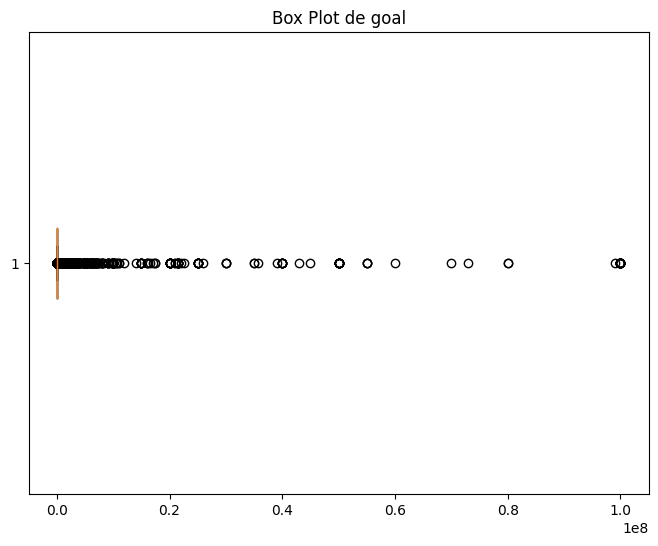

In [89]:
import matplotlib.pyplot as plt

# Sélectionnez l'attribut pour lequel vous voulez détecter les outliers
attribut_a_analyser = 'goal'  # Changez 'goal' par l'attribut que vous voulez analyser

# Créez un box plot pour l'attribut
plt.figure(figsize=(8, 6))
plt.boxplot(donnees_kickstarter[attribut_a_analyser], vert=False)
plt.title(f'Box Plot de {attribut_a_analyser}')
plt.show()


# Préparation des données
